**1.**Următoarele întrebări se referă la certificatul digital al site-ului facultății

a) Cine a emis certificatul digital?

  ESET SSL Filter CA

b) Care este validitatea certificatului?

  Issued On	Tuesday, October 24, 2023 at 5:37:11 PM

  Expires On	Monday, January 22, 2024 at 4:37:10 PM

c) Pe câți biți este definită cheia publică?


d) Care este valoarea exponenților de criptare din certificat și din certificatele care îl
atestă în lanț? Ce observați? Are aceasta impact asupra securității?

  Public Exponent fmi.unibuc.ro (17 bits): 01 00 01 =65537
  
  Public Exponent ESET SSL Filter CA (17 bits): 01 00 01 =65537
  
  Cei doi exponenti sunt identici. 65537(2^16+1) este un exponent comun in practicile de securitate deoarece este relativ mic si nu prezinta vulnerabilitati cunoscute. În general, alegerea aceluiași exponent de criptare într-o ierarhie de certificare este o practică comună pentru simplificarea operațiunilor și pentru a menține uniformitatea.

**2.**

**3.** Răspundeți la următoarele cerințe folosind OpenSSL

a) Generați o cheie RSA. Revedeți laboratorul de criptare asimetrică dacă nu vă mai
amintiți cum realizați acest lucru.

     genrsa -out private_key.pem

b) Folosiți cheia generată anterior într-un certificat self-signed, valabil 120 de zile,
stocat ca ca.crt. Folosiți următoarele informații:

Country: RO

Provincie: Muntenia

Localitate: Bucuresti

Numele organizatiei: CA_SSI

Numele unitatii:CA_SSI_Lab

Common Name: CA_numele vostru (e.g.: CA_Andrei)

E-mail: test@test.ro

     req -new -x509 -days 120 -key private_key.pem -out ca.crt -config C:\Users\Cristina\Downloads\OpenSSL-1.1.1h_win32\openssl.cnf


c) Vizualizați certificatul digital creat:

     x509 -text -noout -in ca.crt

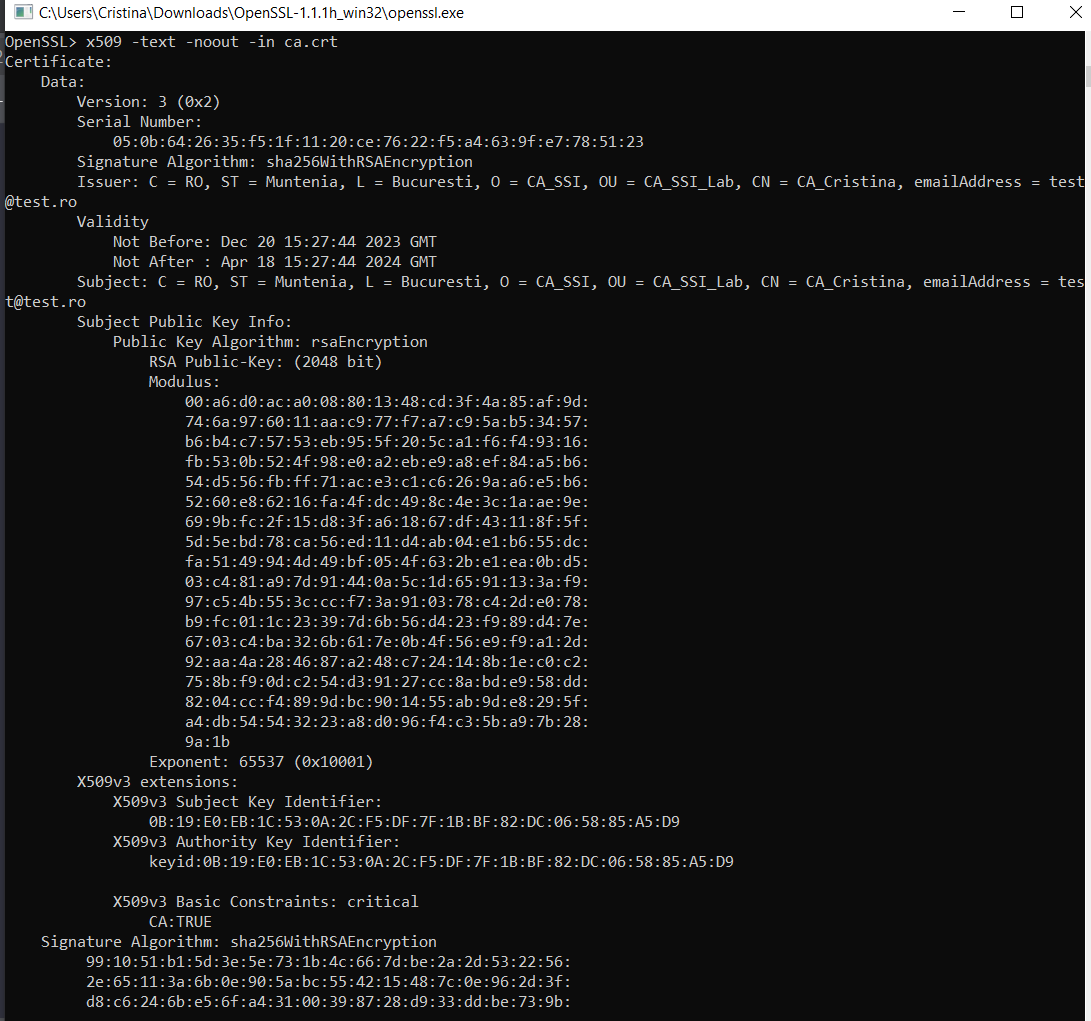




d) Folosiți acest certificat al CA ca să semnați/emiteți un alt certificat al unei entitati
subordonate SUB_SLA. Folositi urmatoarele informatii:

Country: RO

Provincie: Muntenia

Localitate: Bucuresti

Numele organizatiei: SUB_SSI

Numele unitatii:SUB_SSI_Lab

Common Name: SUB_numele vostru (e.g.: CA_Andrei)

E-mail: test_sub@test.ro

Pentru aceasta, mai întâi generați o noua cheie a entității SUB_SSI pe 2048 de biți
in fișierul sub.key.

     genrsa -out sub.key 2048
     req -new -key sub.key -out sub_sla.csr -config C:\Users\Cristina\Downloads\OpenSSL-1.1.1h_win32\openssl.cnf
     x509 -req -in sub_sla.csr -CA ca.crt -CAkey private_key.pem -CAcreateserial -out sub_sla.crt
          >Signature ok
          >subject=C = RO, ST = Muntenia, L = Bucuresti, O = SUB_SSI, OU = SUB_SSI_Lab, CN = SUB_Cristina, emailAddress = test_sub@test.ro
          >Getting CA Private Key


e) Inițiați un Certificate Signing Request (CSR) sub.csr:

     req -new -key sub.key -out sub.csr -config C:\Users\Cristina\Downloads\OpenSSL-1.1.1h_win32\openssl.cnf

f) Creați apoi un certificat pentru SUB_SSI sub.crt semnat de autoritatea CA, valabil pentru 60 de zile, cu numărul serial 02:

     x509 -req -days 60 -in sub.csr -CA ca.crt -CAkey private_key.pem -set_serial 02 -out sub.crt
          >Signature ok
          >subject=C = AU, ST = Some-State, O = Internet Widgits Pty Ltd
          >Getting CA Private Key

g)Vizualizați certificatul digital creat:

     x509 -text -noout -in sub.crt

  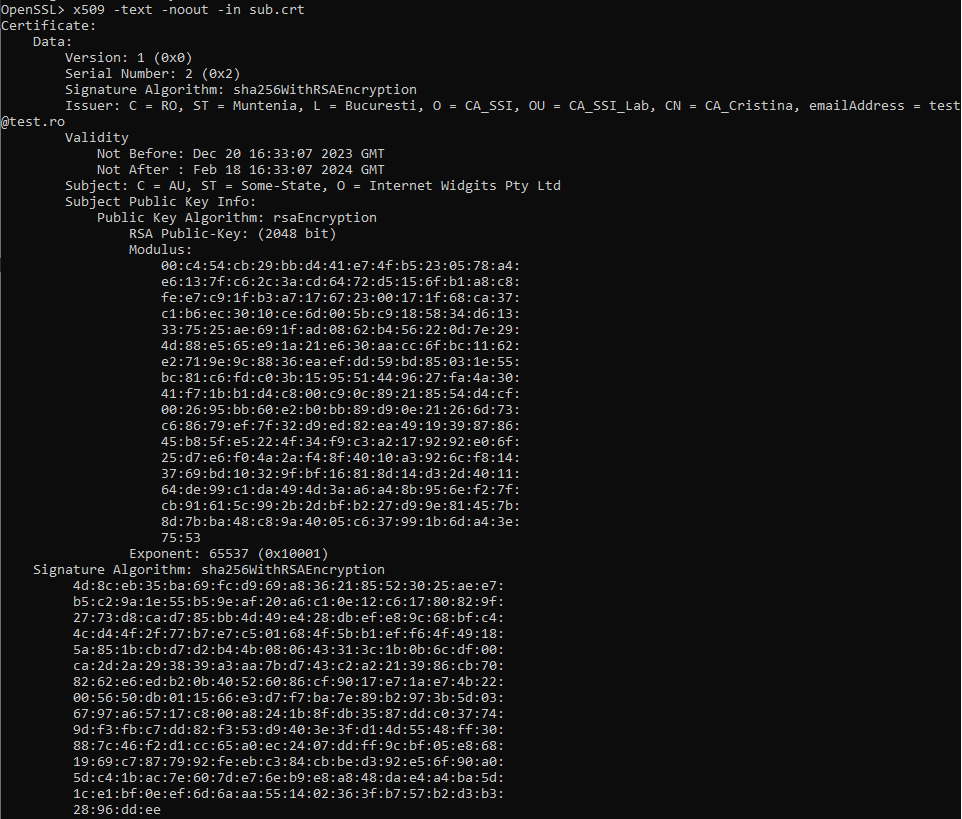


h) Transformați acest certificat digital in PKCS#12:

     pkcs12 -export -out sub.p12 -inkey sub.key -in sub.crt -chain -CAfile ca.crt

i) Verificați conținutul fișierului sub.p12 folosind:

     pkcs12 -info -in sub.p12


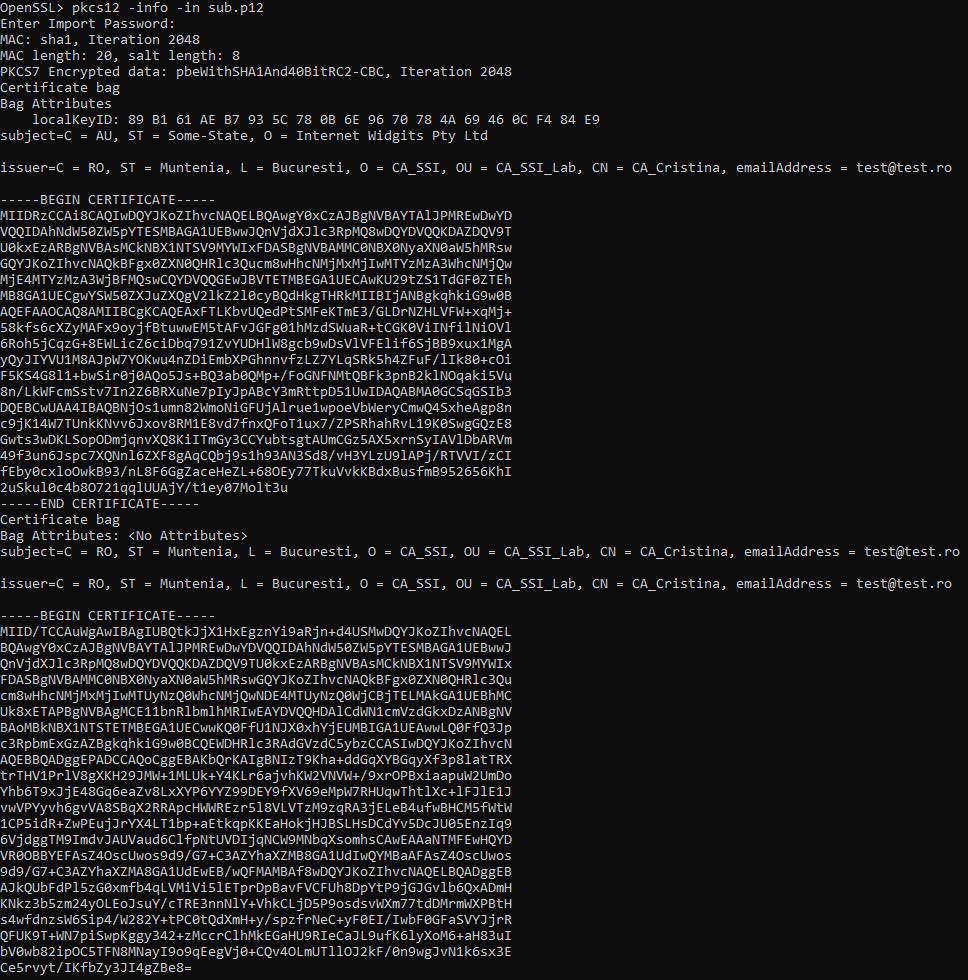